In [18]:
import numpy as np
import os
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from PIL import Image
import random

# デバイスの設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

# データ拡張パラメータの設定
augmentation_params = {
    "rotation_degrees": 30,
    "vertical_translation_factor": 0.5,
    "horizontal_translation_factor": 0.5,
    "scaling_factor": 0.5,
    "zoom_factor": 0.5,
    "brightness_factor": 0.5,
    "contrast_factor": 0.5,
    "saturation_factor": 0.5,
    "hue_factor": 0.5,
    "sharpness_factor": 0.5,
    "noise_factor": 0.5,
    "shear_angle": 30,
    "grayscale_p": 0.5,
    "do_flipping": True,
    "do_vertical_flipping": True
}



Device: cuda


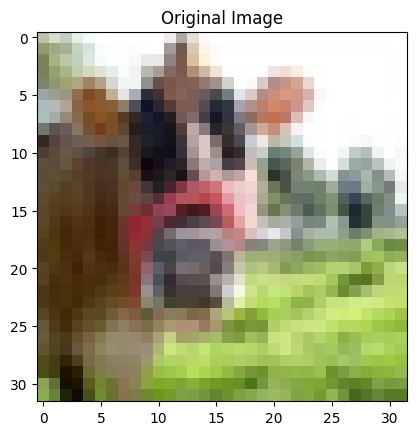

In [19]:
# データセットの読み込み
project_name = "CIFAR100"
dataset_dir = os.path.abspath(os.path.join(os.getcwd(), "../dataset", project_name))

x_train = np.load(os.path.join(dataset_dir, "x_train.npy"))
y_train = np.load(os.path.join(dataset_dir, "y_train.npy"))
x_test = np.load(os.path.join(dataset_dir, "x_test.npy"))
y_test = np.load(os.path.join(dataset_dir, "y_test.npy"))

# サンプル画像を表示する関数
def show_image(img, title="Image"):
    img = img.numpy().transpose((1, 2, 0))
    plt.imshow(img)
    plt.title(title)
    plt.show()

# サンプル画像の表示
sample_img = x_train[0]
sample_img_pil = Image.fromarray(sample_img)
plt.imshow(sample_img_pil)
plt.title("Original Image")
plt.show()


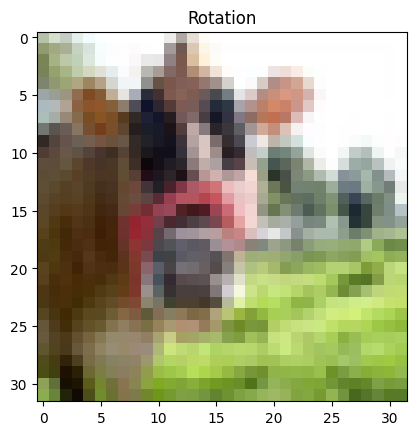

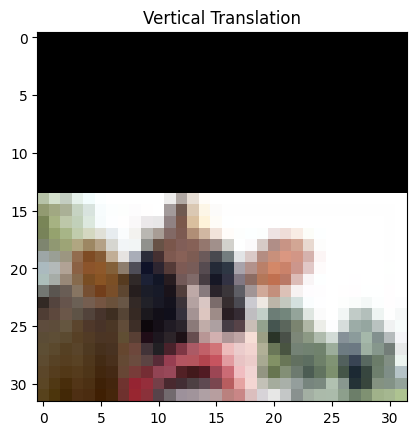

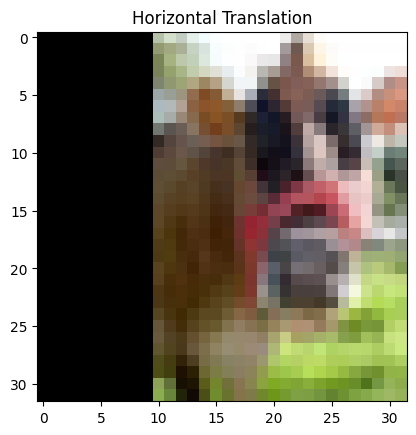

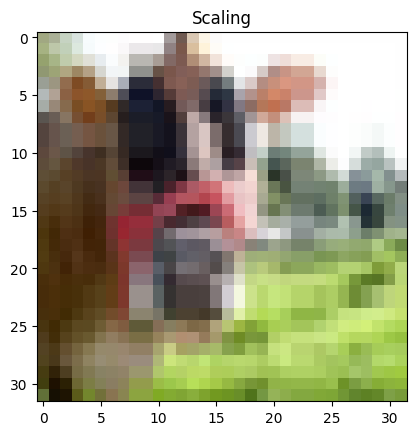

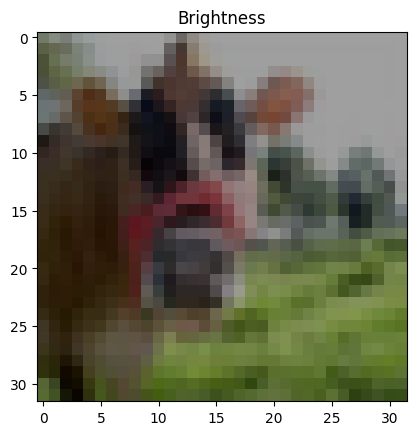

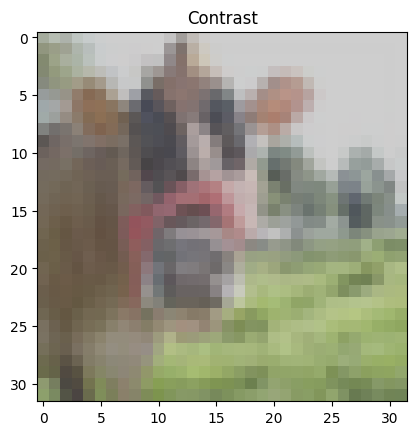

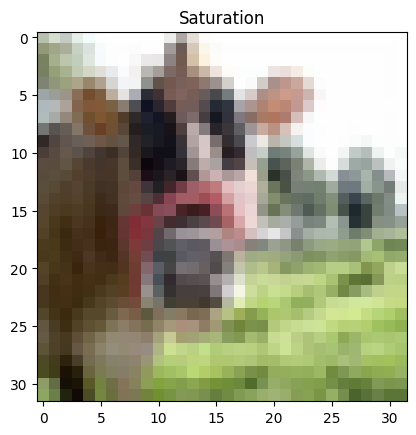

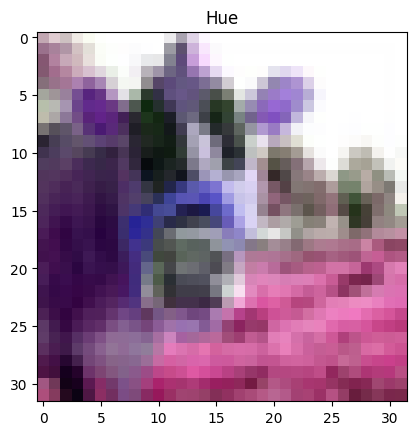

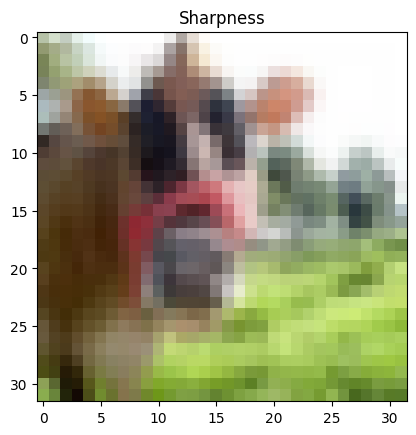

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.3780224..2.6451027].


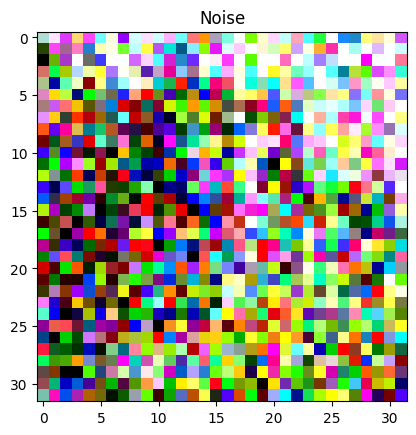

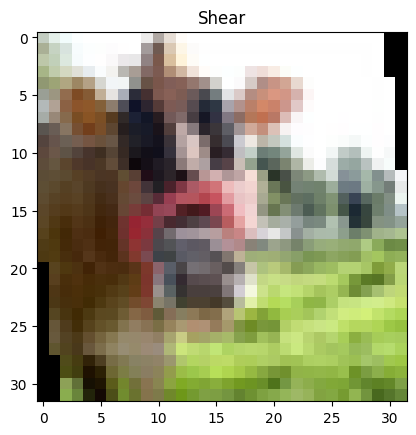

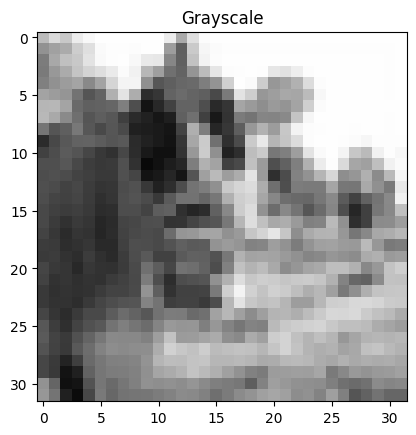

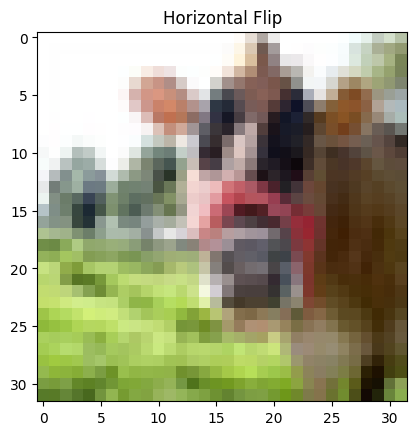

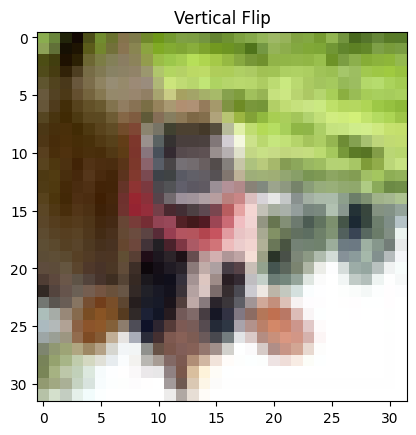

In [20]:
# データ拡張の適用と可視化
def visualize_augmentation(image, augmentation_params):
    augmentation_transforms = {
        "Rotation": transforms.RandomRotation(degrees=(-augmentation_params["rotation_degrees"], augmentation_params["rotation_degrees"])),
        "Vertical Translation": transforms.RandomAffine(degrees=0, translate=(0, augmentation_params["vertical_translation_factor"])),
        "Horizontal Translation": transforms.RandomAffine(degrees=0, translate=(augmentation_params["horizontal_translation_factor"], 0)),
        "Scaling": transforms.RandomAffine(degrees=0, scale=(max(0.1, 1.0 - augmentation_params["scaling_factor"]), 1.0 + augmentation_params["scaling_factor"])),
        "Brightness": transforms.ColorJitter(brightness=augmentation_params["brightness_factor"]),
        "Contrast": transforms.ColorJitter(contrast=augmentation_params["contrast_factor"]),
        "Saturation": transforms.ColorJitter(saturation=augmentation_params["saturation_factor"]),
        "Hue": transforms.ColorJitter(hue=augmentation_params["hue_factor"]),
        "Sharpness": transforms.RandomAdjustSharpness(augmentation_params["sharpness_factor"], p=1.0),
        "Noise": transforms.Lambda(lambda img: img + torch.randn_like(img) * augmentation_params["noise_factor"]),
        "Shear": transforms.RandomAffine(degrees=0, shear=augmentation_params["shear_angle"]),
        "Grayscale": transforms.RandomGrayscale(p=augmentation_params["grayscale_p"]),
        "Horizontal Flip": transforms.RandomHorizontalFlip(p=1.0) if augmentation_params["do_flipping"] else None,
        "Vertical Flip": transforms.RandomVerticalFlip(p=1.0) if augmentation_params["do_vertical_flipping"] else None
    }
    
    for name, transform in augmentation_transforms.items():
        if transform is not None:
            transformed_image = transform(transforms.ToTensor()(image)).to(device)
            show_image(transformed_image.cpu(), title=name)

# サンプル画像にデータ拡張を適用して可視化
visualize_augmentation(sample_img_pil, augmentation_params)
